In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Task 1: Data Preparation
# Read the csv file
df = pd.read_csv('/content/Retail_Transactions_Dataset .csv')
df

In [ ]:
#Parse and convert the Date column into appropriate format
df['Date'] = pd.to_datetime(df['Date'])
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24731,1000024731,2023-10-16 19:25:50,Mr. Juan Thompson,['Vacuum Cleaner'],7,33.88,Credit Card,San Francisco,Pharmacy,False,Professional,Spring,NaN
24732,1000024732,2022-03-04 21:42:50,Gregory Jordan,"['Coffee', 'Cheese', 'Banana']",2,66.15,Mobile Payment,Boston,Specialty Store,False,Professional,Winter,BOGO (Buy One Get One)
24733,1000024733,2020-12-23 22:30:03,Jennifer Turner,['Cleaning Spray'],4,10.75,Credit Card,Boston,Department Store,False,Teenager,Summer,BOGO (Buy One Get One)
24734,1000024734,2020-09-21 05:25:41,Nicole Miller,"['Trash Cans', 'Soda', 'Mustard']",3,35.33,Debit Card,Chicago,Specialty Store,True,Retiree,Fall,BOGO (Buy One Get One)


In [ ]:
#Extract additional useful information like Year, Month, or DayOfWeek from the Date.
df = df.assign(
    Year=df['Date'].dt.year,
    Month=df['Date'].dt.month,
    DayOfWeek=df['Date'].dt.day_name()
)
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,DayOfWeek
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,2022,1,Friday
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023,3,Wednesday
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,2024,3,Thursday
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,2020,10,Saturday
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24731,1000024731,2023-10-16 19:25:50,Mr. Juan Thompson,['Vacuum Cleaner'],7,33.88,Credit Card,San Francisco,Pharmacy,False,Professional,Spring,NaN,2023,10,Monday
24732,1000024732,2022-03-04 21:42:50,Gregory Jordan,"['Coffee', 'Cheese', 'Banana']",2,66.15,Mobile Payment,Boston,Specialty Store,False,Professional,Winter,BOGO (Buy One Get One),2022,3,Friday
24733,1000024733,2020-12-23 22:30:03,Jennifer Turner,['Cleaning Spray'],4,10.75,Credit Card,Boston,Department Store,False,Teenager,Summer,BOGO (Buy One Get One),2020,12,Wednesday
24734,1000024734,2020-09-21 05:25:41,Nicole Miller,"['Trash Cans', 'Soda', 'Mustard']",3,35.33,Debit Card,Chicago,Specialty Store,True,Retiree,Fall,BOGO (Buy One Get One),2020,9,Monday


In [ ]:
#Clean and preprocess the data if required.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24736 entries, 0 to 24735
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_ID     24736 non-null  int64         
 1   Date               24736 non-null  datetime64[ns]
 2   Customer_Name      24736 non-null  object        
 3   Product            24736 non-null  object        
 4   Total_Items        24736 non-null  int64         
 5   Total_Cost         24736 non-null  float64       
 6   Payment_Method     24736 non-null  object        
 7   City               24736 non-null  object        
 8   Store_Type         24736 non-null  object        
 9   Discount_Applied   24735 non-null  object        
 10  Customer_Category  24735 non-null  object        
 11  Season             24735 non-null  object        
 12  Promotion          16509 non-null  object        
 13  Year               24736 non-null  int32         
 14  Month 

In [ ]:
#Clean and preprocess the data if required.
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Items,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,1


In [ ]:
# Fix the Nulls
df['Promotion'] = df['Promotion'].fillna('No Promotion')
print(df['Promotion'].isnull().sum())

0


In [ ]:
mode_value = df['Discount_Applied'].mode()[0]
print(mode_value)

True


In [ ]:
df['Discount_Applied'].fillna(True, inplace=True)

In [ ]:
print(df['Customer_Category'].value_counts())

Customer_Category
Professional      3171
Homemaker         3160
Senior Citizen    3136
Teenager          3130
Student           3055
Young Adult       3052
Retiree           3022
Middle-Aged       3009
Name: count, dtype: int64


In [ ]:
customer_category_mode = df['Customer_Category'].mode()
print(customer_category_mode)

0    Professional
Name: Customer_Category, dtype: object


In [ ]:
df['Customer_Category'].fillna(df['Customer_Category'].mode()[0], inplace=True)

/tmp/ipython-input-350083394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Category'].fillna(df['Customer_Category'].mode()[0], inplace=True)


In [ ]:
null_count = df['Customer_Category'].isnull().sum()
print(null_count)

0


In [ ]:
print("Unique Values and Counts for Season")
print(df['Season'].value_counts())

Unique Values and Counts for Season
Season
Winter    6286
Spring    6198
Fall      6172
Summer    6079
Name: count, dtype: int64


In [ ]:
df['Season'] = df['Season'].fillna(df['Season'].mode()[0])


In [ ]:
null_count = df['Season'].isnull().sum()
print(null_count)

0


In [ ]:
total_null_values = df.isnull().sum().sum()
print(f"Total null values in the DataFrame: {total_null_values}")

Total null values in the DataFrame: 0


In [ ]:
#Task 2: Basic Exploration
#How many total transactions are there?
num_transactions = len(df)
print(f"Total Transactions: {num_transactions}")

Total Transactions: 24736


In [ ]:
#How many unique customers are in the dataset?
unique_customers = df['Customer_Name'].nunique()
print(f"Unique Customers: {unique_customers}")

Unique Customers: 21663


In [ ]:
# What are the top 5 most common products sold across all transactions?
df['Product'].value_counts().head(5)


,count
Product,
['Toothpaste'],124
['Cleaning Spray'],80
['Vinegar'],79
['Baby Wipes'],78
['Cleaning Rags'],77


In [ ]:
# Which cities have the highest number of transactions?
df['City'].value_counts().head(5)


,count
City,
Seattle,2516
Chicago,2500
Dallas,2498
Boston,2493
Atlanta,2484


In [ ]:
# Task 3: Customer Behavior Analysis
# • Which customer categories spend the most on average?
avg_spend = df.groupby('Customer_Category')['Total_Cost'].mean().sort_values(ascending=False)
print(avg_spend)

Customer_Category
Professional      53.450485
Middle-Aged       52.777418
Young Adult       52.568702
Senior Citizen    52.553906
Retiree           52.397995
Homemaker         52.390256
Teenager          52.374569
Student           52.319555
Name: Total_Cost, dtype: float64


In [ ]:
#Do certain customer categories prefer specific payment methods?
grouped_data = df.groupby('Customer_Category')
most_preferred = grouped_data['Payment_Method'].apply(lambda x: x.mode()[0])
print("Most Preferred Payment Method for Each Customer Category")
print(most_preferred)

Most Preferred Payment Method for Each Customer Category
Customer_Category
Homemaker                   Cash
Middle-Aged           Debit Card
Professional         Credit Card
Retiree           Mobile Payment
Senior Citizen       Credit Card
Student              Credit Card
Teenager              Debit Card
Young Adult       Mobile Payment
Name: Payment_Method, dtype: object


In [ ]:
#Cross checking the given results in the most preferred payment method
homemakers_df = df[df['Customer_Category'] == 'Homemaker']
homemaker_counts = homemakers_df['Payment_Method'].value_counts()
print(homemaker_counts)

Payment_Method
Cash              806
Debit Card        795
Mobile Payment    782
Credit Card       777
Name: count, dtype: int64


In [ ]:
#What is the average number of items bought per transaction per store type?
avg_items_per_store = df.groupby('Store_Type')['Total_Items'].mean().sort_values(ascending=False)
print(avg_items_per_store)

Store_Type
Convenience S        9.000000
Specialty Store      5.565177
Pharmacy             5.556832
Department Store     5.545017
Convenience Store    5.516161
Supermarket          5.463765
Warehouse Club       5.458435
Name: Total_Items, dtype: float64


In [ ]:
#Task 4: Promotion & Discount Impact
# What is the average cost of transactions where a discount was applied vs not applied?
avg_cost_by_discount = df.groupby('Discount_Applied')['Total_Cost'].mean()
print("--- Average Transaction Cost by Discount Status ---")
print(avg_cost_by_discount)
# False (No Discount)	True (Discount Applied)	$52.73

--- Average Transaction Cost by Discount Status ---
Discount_Applied
False    52.477785
True     52.734220
Name: Total_Cost, dtype: float64


In [ ]:
# Compare the average number of items purchased for different promotion types.
avg_items_by_promotion = df.groupby('Promotion')['Total_Items'].mean().sort_values(ascending=False)
print(avg_items_by_promotion)

Promotion
Discount on Selected Items    5.549433
No Promotion                  5.505895
BOGO (Buy One Get One)        5.499087
Name: Total_Items, dtype: float64


In [ ]:
# Which promotion type seems to be most effective in terms of increasing total cost?
avg_cost_by_promotion = df.groupby('Promotion')['Total_Cost'].mean().sort_values(ascending=False)
print("--- Average Transaction Cost by Promotion Type (Sorted) ---")
print(avg_cost_by_promotion)

--- Average Transaction Cost by Promotion Type (Sorted) ---
Promotion
BOGO (Buy One Get One)        52.922353
No Promotion                  52.740378
Discount on Selected Items    52.160271
Name: Total_Cost, dtype: float64


In [ ]:
#Task 5: Seasonality Trends
# Which season has the highest total revenue?
total_revenue_by_season = df.groupby('Season')['Total_Cost'].sum().sort_values(ascending=False)
print(total_revenue_by_season)


Season
Winter    330116.88
Spring    325486.84
Fall      323545.61
Summer    322120.18
Name: Total_Cost, dtype: float64


In [ ]:
#Task 5: Seasonality Trends
#Are there seasonal preferences for certain store types or product categories?
seasonal_preference = df.groupby(['Season', 'Store_Type']).size().reset_index(name='Transaction_Count')
top_3_stores = seasonal_preference.groupby('Season').apply(
    lambda x: x.sort_values('Transaction_Count', ascending=False).head(3)
)
top_3_stores = top_3_stores.reset_index(drop=True)
print("--- Top 3 Most Preferred Store Types for Each Season ---")
print(top_3_stores)

--- Top 3 Most Preferred Store Types for Each Season ---
    Season         Store_Type  Transaction_Count
0     Fall    Specialty Store               1119
1     Fall           Pharmacy               1032
2     Fall   Department Store               1015
3   Spring    Specialty Store               1082
4   Spring  Convenience Store               1041
5   Spring   Department Store               1038
6   Summer    Specialty Store               1060
7   Summer           Pharmacy               1032
8   Summer     Warehouse Club               1030
9   Winter   Department Store               1113
10  Winter     Warehouse Club               1070
11  Winter        Supermarket               1049


/tmp/ipython-input-83561786.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_stores = seasonal_preference.groupby('Season').apply(


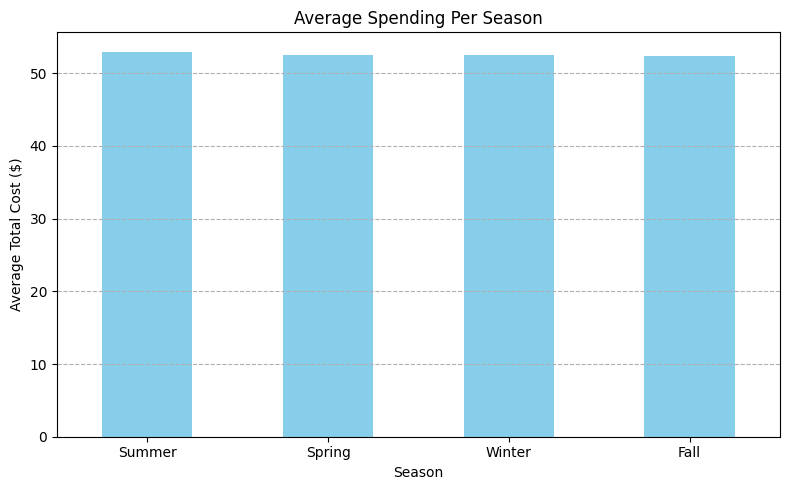

In [ ]:
#Create a plot showing average spending per season.
avg_spending_per_season = df.groupby('Season')['Total_Cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_spending_per_season.plot(kind='bar', color='skyblue')
plt.title('Average Spending Per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cost ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

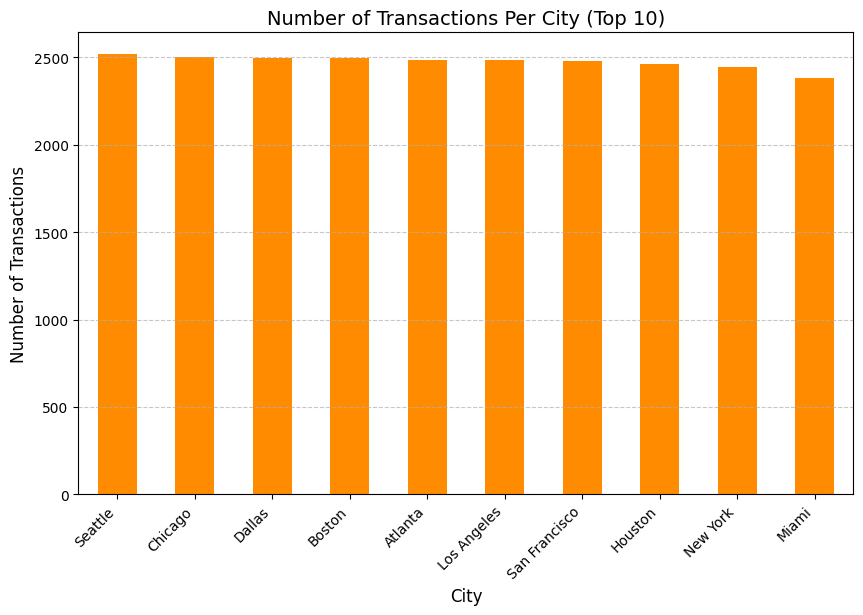

In [ ]:
#Task 6: Visualization Dashboard
#Bar plot of number of transactions per city
transactions_per_city = df['City'].value_counts()
plt.figure(figsize=(10, 6))
transactions_per_city.plot(kind='bar', color='darkorange')
plt.title('Number of Transactions Per City (Top 10)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate and align x-labels for better readability
plt.grid(axis='y', linestyle='--', alpha= 0.7)

Text(0.5, 1.0, 'Distribution of Payment Methods')

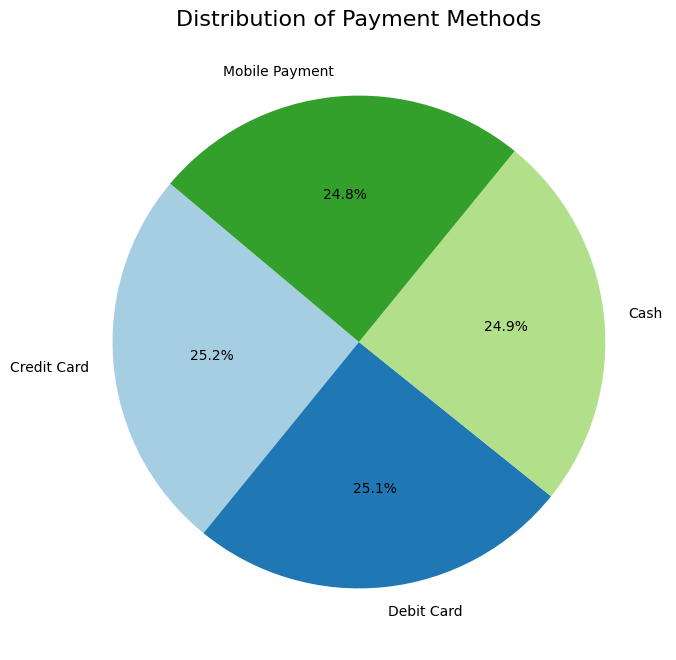

In [ ]:
#Pie chart showing distribution of payment methods
payment_method_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(8, 8)) # Adding this line to define the figure for the plot.
plt.pie(
    payment_method_counts,
    labels=payment_method_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors)
plt.title('Distribution of Payment Methods', fontsize=16)

In [ ]:
#Line chart of monthly revenue trends (grouped by year if applicable)
monthly_revenue = df.set_index('Date').resample('M')['Total_Cost'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='forestgreen', linewidth=2)
plt.title('Monthly Revenue Trend Over Time', fontsize=16)
plt.xlabel('Date (Month/Year)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

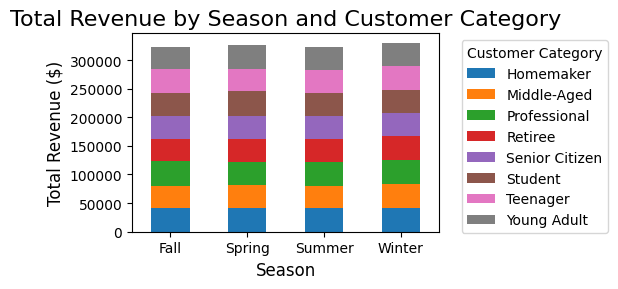

In [ ]:
# Heatmap or stacked bar showing revenue by season and customer category
revenue_by_season_category = df.groupby(['Season', 'Customer_Category'])['Total_Cost'].sum()
revenue_unstacked = revenue_by_season_category.unstack()
revenue_unstacked.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Total Revenue by Season and Customer Category', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Customer Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()